# Machine Learning - Assignment 1

## Naive Bayes Learning algorithm, Cross-validation, and ROC-Curves

The aim of the assignment is to implement:

* Naive Bayes learning algorithm for binary classification tasks
* Visualization to plot a ROC-curve
* A cross-validation test
* Visualization of the average ROC-curve of a cross-validation test

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the inputs or outputs of the function.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, but how you return values from the different functions might vary, and you might find yourself going back and change something to make it easier later on.

## Assignment preparations

We help you out with importing the libraries and reading the data.

Look at the output to get an idea of how the data is structured.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import e, pi, sqrt

In [30]:
class Data_set:
    def __init__(self):
        self.data = None
        self.features = None
        self.labels = None
        self.means = 0.0
        self.prior = 0.0
        self.std_devs = 0.0
        self.gaussian_probability_density = 0.0

    def fix_data_structure(self):
        if all(isinstance(row, np.ndarray) for row in self.features):
            try:
                self.features = np.array(self.features, dtype=float)
            except ValueError as e:
                print("Erreur lors de la conversion :", e)
        else:
            print("Les éléments ne sont pas tous des tableaux numpy.")

    def class_split(self):
        self.features = self.data[:, :-1]
        self.labels = self.data[:, -1]
        self.fix_data_structure()

    def display_features_and_labels(self):
        print("Features set:")
        print(self.features)
        print("Labels set:")
        print(self.labels)

In [31]:
# creating a class to make the code cleaner
class Flower:
    def __init__(self):
        self.data = None
        self.train = Data_set()
        self.test = Data_set()
        self.test_size = 0.2

    def train_test_split(self):
        np.random.shuffle(data)
        
        split_index = int(len(self.data) * (1 - self.test_size))

        self.train.data = self.data[:split_index]
        self.test.data = self.data[split_index:]

    def class_split_automation(self):
        self.train.class_split()
        self.test.class_split()
        self.train.display_features_and_labels()
        self.test.display_features_and_labels()

    def display_training(self):
        print("Train set:")
        print(self.train.data[:3])
        print("Test set:")
        print(self.test.data[:3])

In [32]:
data = pd.read_csv("iris.csv").to_numpy()

mapped, index, unique_arr = np.unique(data[:, -1], return_index=True, return_inverse=True)
data[:, -1] = unique_arr

iris_setosa = Flower()
iris_versicolor = Flower()
iris_virginica = Flower()

iris_setosa.data, iris_versicolor.data, iris_virginica.data = np.split(data, index[1:])

print(f"Full data array (features and labels):\n{iris_setosa.data[:3]}\n")
print("###############\n")
print(f"Train features (first 4 columns):\n{iris_setosa.data[:3, :-1]}\n")
print(f"Labels (last column):\n{iris_setosa.data[:3, -1:]}\n")
print(f"Names of labels:\n{[[numb, name] for numb, name in enumerate(mapped)]}")

Full data array (features and labels):
[[5.1 3.5 1.4 0.2 0]
 [4.9 3.0 1.4 0.2 0]
 [4.7 3.2 1.3 0.2 0]]

###############

Train features (first 4 columns):
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Labels (last column):
[[0]
 [0]
 [0]]

Names of labels:
[[0, 'Iris-setosa'], [1, 'Iris-versicolor'], [2, 'Iris-virginica']]


In [33]:
# Example print of the 3 first datapoints (similar as above):
iris_setosa.data[:3]

array([[5.1, 3.5, 1.4, 0.2, 0],
       [4.9, 3.0, 1.4, 0.2, 0],
       [4.7, 3.2, 1.3, 0.2, 0]], dtype=object)

## Data handling functions

As a start, we are going to implement some basic data handling functions to use in the future.

### 1) Split class into a train and test set

First, we need to be able to split the class into a train and test set.

In [34]:
# TODO: Test the train_test_split function
iris_setosa.train_test_split()
iris_versicolor.train_test_split()
iris_virginica.train_test_split()

# TODO: Print the output
iris_setosa.display_training()
iris_versicolor.display_training()
iris_virginica.display_training()

Train set:
[[6.8 3.0 5.5 2.1 2]
 [5.7 3.0 4.2 1.2 1]
 [6.7 3.1 5.6 2.4 2]]
Test set:
[[4.8 3.0 1.4 0.1 0]
 [5.8 2.7 5.1 1.9 2]
 [5.7 3.8 1.7 0.3 0]]
Train set:
[[5.5 2.6 4.4 1.2 1]
 [5.7 4.4 1.5 0.4 0]
 [5.0 3.5 1.3 0.3 0]]
Test set:
[[5.4 3.7 1.5 0.2 0]
 [6.2 3.4 5.4 2.3 2]
 [7.7 2.6 6.9 2.3 2]]
Train set:
[[5.5 4.2 1.4 0.2 0]
 [6.5 3.0 5.2 2.0 2]
 [5.6 3.0 4.5 1.5 1]]
Test set:
[[5.7 2.5 5.0 2.0 2]
 [6.5 3.2 5.1 2.0 2]
 [5.1 2.5 3.0 1.1 1]]


### 2) Split data into features and labels

The data as shown above is not always the optimal shape. To help us keep track of things, we can split the data into its features and labels seperately.

Each class is 4 features and 1 label in the same array: 

* **[feature 1, feature 2, feature 3, feature 4, label]**

It would help us later to have the features and labels in seperate arrays in the form: 

* **[feature 1, feature 2, feature 3, feature 4]** and **[label]**

Here you are going to implement this functionallity.

We should first test the "**class_split**" function on one of the classes above (iris_setosa, etc...) to make sure it works properly.

In [35]:
# TODO: Test the class splitting function
# iris_setosa.train.class_split()
# iris_setosa.test.class_split()

# iris_versicolor.train.class_split()
# iris_versicolor.test.class_split()

# iris_virginica.train.class_split()
# iris_virginica.test.class_split()

# TODO: Print the output
# iris_setosa.train.display_features_and_labels()
# iris_setosa.test.display_features_and_labels()

# iris_versicolor.train.display_features_and_labels()
# iris_versicolor.test.display_features_and_labels()

# iris_virginica.train.display_features_and_labels()
# iris_virginica.test.display_features_and_labels()

# Or 

iris_setosa.class_split_automation()
iris_versicolor.class_split_automation()
iris_virginica.class_split_automation()

Features set:
[[6.8 3.  5.5 2.1]
 [5.7 3.  4.2 1.2]
 [6.7 3.1 5.6 2.4]
 [6.  2.2 4.  1. ]
 [7.  3.2 4.7 1.4]
 [4.3 3.  1.1 0.1]
 [5.9 3.  5.1 1.8]
 [4.4 3.2 1.3 0.2]
 [5.2 2.7 3.9 1.4]
 [6.3 3.4 5.6 2.4]
 [6.3 2.8 5.1 1.5]
 [6.1 2.8 4.7 1.2]
 [6.7 3.1 4.4 1.4]
 [6.9 3.2 5.7 2.3]
 [7.7 3.8 6.7 2.2]
 [5.9 3.2 4.8 1.8]
 [6.4 3.2 5.3 2.3]
 [6.5 2.8 4.6 1.5]
 [4.9 3.  1.4 0.2]
 [5.  3.4 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [7.7 3.  6.1 2.3]
 [6.1 3.  4.6 1.4]
 [7.6 3.  6.6 2.1]
 [4.9 2.4 3.3 1. ]
 [5.1 3.8 1.5 0.3]
 [7.7 2.8 6.7 2. ]
 [4.7 3.2 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.8 2.8 4.8 1.4]
 [5.6 2.9 3.6 1.3]
 [5.8 2.7 4.1 1. ]
 [6.4 3.1 5.5 1.8]
 [7.2 3.6 6.1 2.5]
 [5.7 2.6 3.5 1. ]
 [7.2 3.  5.8 1.6]
 [6.2 2.8 4.8 1.8]
 [6.3 2.5 5.  1.9]
 [6.1 3.  4.9 1.8]
 [4.8 3.4 1.9 0.2]]
Labels set:
[2 1 2 1 1 0 2 0 1 2 2 1 1 2 2 1 2 1 0 0 0 2 1 2 1 0 2 0 0 1 1 1 2 2 1 2 2
 2 2 0]
Features set:
[[4.8 3.  1.4 0.1]
 [5.8 2.7 5.1 1.9]
 [5.7 3.8 1.7 0.3]
 [6.3 2.5 4.9 1.5]
 [7.1 3.  5.9 2.1]
 [5.  3.5 1.6 0.6]
 [

We should also try to **1)** first split a class into a train and test set, **2)** split each of these two into features and abels. In total there should be 4 arrays (2 feature and 2 label arrays).

## Naive Bayes learning algorithm

When implementing the Navie Bayes learning algorithm, we can break it down into a few components.

We will implement these components one at a time.

### 3) Calculate feature statistics

First, we need to implement a function that returns feature statistics (means, standard deviation, priors) for a given set of feature data for a single class. This is the equivalent of "training" the naive bayes model.

**Note 1:** Each feature gets its own mean and standard deviation!

**Note 2:** The way you structure the functions (what is returned) shapes the remainder of the assignment.

In [36]:
def calculate_feature_statistics(data, total):
    data = np.array(data, dtype=float)

    means = np.mean(data, axis=0)
    means = [round(val, 3) for val in means]

    std_devs = np.std(data, axis=0, ddof=0)
    std_devs = [round(val, 3) for val in std_devs]

    prior = len(data) / len(total)

    return means, std_devs, round(prior, 3)


To make sure the function works, we should test it before proceding.

In [37]:
# TODO: Make sure to use our previous class splitting function.
# print(type(iris_setosa.train.features), iris_setosa.train.features)

# TODO: Test the function here for one of the dataset classes. 
iris_setosa.train.means, iris_setosa.train.std_devs, iris_setosa.train.prior = calculate_feature_statistics(iris_setosa.train.features, data)
iris_versicolor.train.means, iris_versicolor.train.std_devs, iris_versicolor.train.prior = calculate_feature_statistics(iris_versicolor.train.features, data)
iris_virginica.train.means, iris_virginica.train.std_devs, iris_virginica.train.prior = calculate_feature_statistics(iris_virginica.train.features, data)

# TODO: Print the output from the feature statistic function.
# print("feature", iris_setosa.train.features)
print("means", iris_setosa.train.means)
print("std_devs", iris_setosa.train.std_devs) 
print("prior", iris_setosa.train.prior) 

means [np.float64(6.06), np.float64(3.042), np.float64(4.215), np.float64(1.365)]
std_devs [np.float64(0.939), np.float64(0.342), np.float64(1.676), np.float64(0.748)]
prior 0.267


### 4) Gaussian probability density function (Gaussian PDF)

Now we need to implement the gaussian probability density function to use for a single datapoint.

**Note:** Look at the imports in the first cell at the top, it has some math numbers for easy use here. 

In [38]:
def gaussian_probability_density_function(x, mean, stdev):
    exponent = np.exp(-((x - mean) ** 2) / (2 * (stdev ** 2)))
    coefficient = 1 / (np.sqrt(2 * np.pi * (stdev ** 2)))
    return round(coefficient * exponent, 3)

In [39]:
def for_each_gaussian(item):
    item.train.gaussian_probability_density = [
        [
            gaussian_probability_density_function(x, mean, stdev)
            for x, mean, stdev in zip(row, item.train.means, item.train.std_devs)
        ]
        for row in item.train.features
    ]



### 5) Testing Gaussian PDF

We should test it to make sure it works. Train it, using the "calculate_feature_statistics" function, on one of the dataset classes. Then, take one datapoint from the same class and use naive bayes gaussian to make a prediction.

In [40]:
# TODO: Implement the code below to test the "gaussian_probability_density_function" function for one of the classes.
# TODO: Test with one datapoint from the learned class.

for_each_gaussian(iris_setosa)
for_each_gaussian(iris_versicolor)
for_each_gaussian(iris_virginica)

#print(iris_setosa.train.gaussian_probability_density)

# TODO: Print the probability density
for n in iris_setosa.train.gaussian_probability_density:
        print(n)

[np.float64(0.311), np.float64(1.158), np.float64(0.177), np.float64(0.329)]
[np.float64(0.395), np.float64(1.158), np.float64(0.238), np.float64(0.521)]
[np.float64(0.337), np.float64(1.15), np.float64(0.169), np.float64(0.205)]
[np.float64(0.424), np.float64(0.056), np.float64(0.236), np.float64(0.473)]
[np.float64(0.257), np.float64(1.048), np.float64(0.228), np.float64(0.533)]
[np.float64(0.073), np.float64(1.158), np.float64(0.042), np.float64(0.128)]
[np.float64(0.419), np.float64(1.158), np.float64(0.207), np.float64(0.45)]
[np.float64(0.089), np.float64(1.048), np.float64(0.052), np.float64(0.159)]
[np.float64(0.279), np.float64(0.708), np.float64(0.234), np.float64(0.533)]
[np.float64(0.411), np.float64(0.674), np.float64(0.169), np.float64(0.205)]
[np.float64(0.411), np.float64(0.908), np.float64(0.207), np.float64(0.525)]
[np.float64(0.424), np.float64(0.908), np.float64(0.228), np.float64(0.521)]
[np.float64(0.337), np.float64(1.15), np.float64(0.237), np.float64(0.533)]
[n

In [41]:
for n in iris_versicolor.train.gaussian_probability_density:
    print(n)

[np.float64(0.533), np.float64(0.465), np.float64(0.196), np.float64(0.515)]
[np.float64(0.548), np.float64(0.019), np.float64(0.124), np.float64(0.35)]
[np.float64(0.358), np.float64(0.609), np.float64(0.108), np.float64(0.309)]
[np.float64(0.511), np.float64(0.83), np.float64(0.19), np.float64(0.449)]
[np.float64(0.511), np.float64(0.71), np.float64(0.139), np.float64(0.268)]
[np.float64(0.495), np.float64(0.77), np.float64(0.19), np.float64(0.449)]
[np.float64(0.287), np.float64(0.83), np.float64(0.114), np.float64(0.336)]
[np.float64(0.165), np.float64(0.842), np.float64(0.084), np.float64(0.147)]
[np.float64(0.033), np.float64(0.681), np.float64(0.071), np.float64(0.294)]
[np.float64(0.202), np.float64(0.83), np.float64(0.137), np.float64(0.147)]
[np.float64(0.511), np.float64(0.207), np.float64(0.108), np.float64(0.35)]
[np.float64(0.548), np.float64(0.681), np.float64(0.19), np.float64(0.501)]
[np.float64(0.421), np.float64(0.125), np.float64(0.19), np.float64(0.449)]
[np.float6

As a test, take one datapoint from one of the other classes and see if the predicted probability changes.

Think a bit why the probability changes, what could affect the prediction?

## Prepare Naive Bayes for binary classification

### 6) Prepare the data for inference

Before we train and test the naive bayes for multiple classes, we should get our data in order.

Similar to how we did previously, we should now split two classes into a train and test set, you may choose which two classes freely.

In [42]:
# TODO: Split two classes into train and test sets.

# already done in my class flower

# TODO: Sepearte the features and lables for both the train and test set.

# already done in my class flower


# Class A : iris_setosa

# Class B : iris_versicolor

### 7) Class A vs Class B for binary classification

**Note:** You might need to go back and forth a bit in the following cells during your implementation of your code.

We have to get the probability from two sets of classes and compare the two probabilities in order to make a propper prediction.

Here we will implement two functions to make this possible. We seperate these functions to make the implementation of the ROC-curve easier later on.

**Function 1: naive_bayes_prediction** 
* A function that returns the probabilities for each class the model for a single datapoint.

**Function 2: probabilities_to_prediction**
* A function that takes in probabilities and returns a prediction.

In [43]:
def naive_bayes_prediction(feature_stats, data_point):
    probabilities = {}
    
    for class_label, stats in feature_stats.items():
        mean, stdev, prior = stats['mean'], stats['stdev'], stats['prior']
        
        # Probability for this class
        prob = prior
        for x, m, s in zip(data_point, mean, stdev):
            prob *= gaussian_probability_density_function(x, m, s)
        
        probabilities[class_label] = prob

    return probabilities

In [44]:
def probabilities_to_prediction(probabilities):
    class_prediction = max(probabilities, key=probabilities.get)
    return class_prediction

To test the function we need the feature metrics from the classes we choose. 

**Note:** Choose the correct train/test set and the correct feature/label split!

In [45]:
# TODO: Get the feature metrics for the classes.

Now we should have implemented all the neccessary parts to train a naive bayes algorithm and do inference on it. Implement a small test workflow for two of your chosen classes.

In [46]:
def evaluate_and_get_probs(item, feature_stats, actual_class_name, positive_class_name):
    correct = 0
    total = len(item.test.features)

    prediction_probabilities = []
    test_labels = []

    for x, true_label in zip(item.test.features, item.test.labels):
        probs = naive_bayes_prediction(feature_stats, x)  
        prediction = probabilities_to_prediction(probs)

        is_correct = (prediction == actual_class_name)
        correct += int(is_correct)

        print(f"Features: {x}, Prediction = {prediction}, Actual = {actual_class_name}")

        p_pos = probs[positive_class_name]
        prediction_probabilities.append(p_pos)

        if actual_class_name == positive_class_name:
            test_labels.append(1)
        else:
            test_labels.append(0)

    accuracy_test = correct / total
    print(f"\nAccuracy on {actual_class_name} test samples = {accuracy_test:.2f}\n")

    return prediction_probabilities, test_labels

In [47]:
feature_stats = {
    "setosa": {
        'mean': iris_setosa.train.means,
        'stdev': iris_setosa.train.std_devs,
        'prior': iris_setosa.train.prior
    },
    "versicolor": {
        'mean': iris_versicolor.train.means,
        'stdev': iris_versicolor.train.std_devs,
        'prior': iris_versicolor.train.prior
    }
}

pred_probs_setosa, labels_setosa = evaluate_and_get_probs(
    iris_setosa,
    feature_stats,
    actual_class_name="setosa",
    positive_class_name="setosa"
)

pred_probs_versi, labels_versi = evaluate_and_get_probs(
    iris_versicolor,
    feature_stats,
    actual_class_name="versicolor",
    positive_class_name="setosa"
)

all_pred_probs = pred_probs_setosa + pred_probs_versi
all_labels = labels_setosa + labels_versi


Features: [4.8 3.  1.4 0.1], Prediction = versicolor, Actual = setosa
Features: [5.8 2.7 5.1 1.9], Prediction = setosa, Actual = setosa
Features: [5.7 3.8 1.7 0.3], Prediction = versicolor, Actual = setosa
Features: [6.3 2.5 4.9 1.5], Prediction = setosa, Actual = setosa
Features: [7.1 3.  5.9 2.1], Prediction = setosa, Actual = setosa
Features: [5.  3.5 1.6 0.6], Prediction = versicolor, Actual = setosa
Features: [6.7 3.  5.  1.7], Prediction = setosa, Actual = setosa
Features: [6.4 2.9 4.3 1.3], Prediction = setosa, Actual = setosa
Features: [4.9 3.1 1.5 0.1], Prediction = versicolor, Actual = setosa
Features: [4.4 2.9 1.4 0.2], Prediction = versicolor, Actual = setosa

Accuracy on setosa test samples = 0.50

Features: [5.4 3.7 1.5 0.2], Prediction = versicolor, Actual = versicolor
Features: [6.2 3.4 5.4 2.3], Prediction = setosa, Actual = versicolor
Features: [7.7 2.6 6.9 2.3], Prediction = setosa, Actual = versicolor
Features: [5.6 2.8 4.9 2. ], Prediction = setosa, Actual = versic

## ROC-curve

A ROC curve, or *Receiver Operating Characteristic curve*, is a graphical plot that illustrates the performance of a binary classifier such as our Naive Bayes model.

More info can be found in the course material and here: [https://en.wikipedia.org/wiki/Receiver_operating_characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

Another good illustration by Google can be found here: [https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Now that we have a prediction model, we would want to try it out and test it using a ROC-curve.

### 8) True Positive Rate (TPR) and False Positive Rate (FPR)

From our prediction function we get probabilities, and for prediction purposes we have just predicted the one with the highest probability.

To plot a ROC-curve, we need the TPR and FPR for the binary classification. We will implement this here.

**Note 1:** The threshold is is a value that goes from 0 to 1. 

**Note 2:** One of the two classes will be seen as "the positive class" (prediction over the threshold) and the other as "the negative class" (prediction under the threshold).

**Note 3:** The threshold stepsize will decide the size of the returned TPR/FPR list. A value of 0.1 will give 10 elements (0 to 1 in increments of 0.1)

In [48]:
# Stepsize demonstration
print("Python list:", [x/10 for x in range(0,10,1)])

# Stepsize demonstration with numpy:
print("Numpy linspace:", np.linspace(0,1,11))
print("Numpy linspace (no endpoint):", np.linspace(0,1,10,endpoint=False))

Python list: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Numpy linspace: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Numpy linspace (no endpoint): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [49]:
def TPR_and_FPR(prediction_probabilities, test_labels, threshold_stepsize=0.1):
    thresholds = np.linspace(0, 1, int(1/threshold_stepsize) + 1)
    TPR_list = []
    FPR_list = []

    prediction_probabilities = np.array(prediction_probabilities, dtype=float)
    test_labels = np.array(test_labels, dtype=int)

    for threshold in thresholds:
        predicted_labels = (prediction_probabilities >= threshold).astype(int)

        TP = np.sum((predicted_labels == 1) & (test_labels == 1))
        FP = np.sum((predicted_labels == 1) & (test_labels == 0))
        TN = np.sum((predicted_labels == 0) & (test_labels == 0))
        FN = np.sum((predicted_labels == 0) & (test_labels == 1))

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0.0

        TPR_list.append(TPR)
        FPR_list.append(FPR)

    return TPR_list, FPR_list


In [50]:
# TODO: Test the "TPR_and_FPR" function on the model you have created previously.
TPR, FPR = TPR_and_FPR(all_pred_probs, all_labels, threshold_stepsize=0.1)
print("TPR =", TPR)
print("FPR =", FPR)


TPR = [np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
FPR = [np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


How does the values change if you change the threshold stepsize? 

How does the values change if you change the classes you compare?

### 9) Plot the TPR and FPR

To better see what is going on, we can plot the TPR and FPR. We can also calculate the Area Under the ROC Curve (AUC or AUROC) at the same time.

In [51]:
def plot_ROC(TPR, FPR):

    auc_score = np.trapz(TPR, x=FPR)

    plt.figure(figsize=(6, 6))
    plt.plot(FPR, TPR, marker='o', label=f"ROC Curve (AUC={auc_score:.3f})")

    plt.plot([0, 1], [0, 1], 'r--', label="Baseline aléatoire")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print(f"AUC : {auc_score:.3f}")

/var/folders/yx/0678sjj54074f8593p3dv0cc0000gn/T/ipykernel_32103/211272936.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score = np.trapz(TPR, x=FPR)


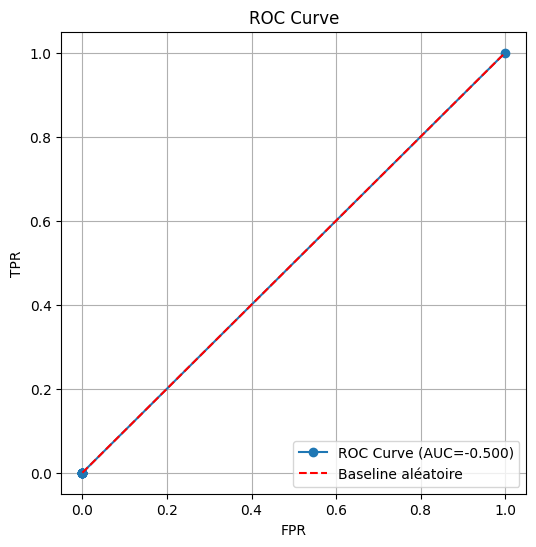

AUC : -0.500


In [52]:
# TODO: Test the plotting function on the TPR and FPR you just calculated.
TPR, FPR = TPR_and_FPR(all_pred_probs, all_labels, threshold_stepsize=0.1)
plot_ROC(TPR, FPR)

## Cross-validation

The final task is to take everything you have implemented so far and apply it in a cross-validation loop.

**Note 1:** To better reflect a real scenarios, you should shuffle the data before doing cross-validation.

**Note 2:** When using cross-validation, the interesting thing is the mean performance (mean AUC, mean accuracy, mean ROC-curve).

**Note 3:** This part is a bit more free in terms of implementation, but make sure to use some of the previously implemented functions.

### 10) Cross-validation loop

In [53]:
def cross_validation(features, labels, folds=5, threshold_stepsize=0.1):
    features = np.array(features, dtype=float)
    labels = np.array(labels, dtype=int)
    N = len(labels)

    indices = np.arange(N)
    np.random.shuffle(indices)

    fold_size = N // folds

    all_TPR = []
    all_FPR = []

    for i in range(folds):
        start = i * fold_size
        end = (i+1)*fold_size if (i < folds-1) else N

        test_indices = indices[start:end]

        train_indices = np.concatenate((indices[:start], indices[end:]))

        X_train = features[train_indices]
        y_train = labels[train_indices]
        X_test  = features[test_indices]
        y_test  = labels[test_indices]

        X_train_pos = X_train[y_train == 1]
        X_train_neg = X_train[y_train == 0]

        means_pos, stdevs_pos, prior_pos = calculate_feature_statistics(X_train_pos, X_train)
        means_neg, stdevs_neg, prior_neg = calculate_feature_statistics(X_train_neg, X_train)

        feature_stats_fold = {
            1: {
                'mean':  means_pos,
                'stdev': stdevs_pos,
                'prior': prior_pos
            },
            0: {
                'mean':  means_neg,
                'stdev': stdevs_neg,
                'prior': prior_neg
            }
        }

        prediction_probabilities = []
        for x_vec in X_test:
            probs = naive_bayes_prediction(feature_stats_fold, x_vec)
            prob_pos = probs[1]
            prediction_probabilities.append(prob_pos)

        fold_TPR, fold_FPR = TPR_and_FPR(prediction_probabilities, y_test, threshold_stepsize)
        all_TPR.append(fold_TPR)
        all_FPR.append(fold_FPR)

    all_TPR = np.array(all_TPR)
    all_FPR = np.array(all_FPR)

    mean_TPR = np.mean(all_TPR, axis=0)
    mean_FPR = np.mean(all_FPR, axis=0)

    plot_ROC(mean_TPR, mean_FPR)


### 11) 10-fold Cross-validation on all classes

Test the "cross_validation" function on all the classes against eachother using 10 folds.

* Iris-setosa vs Iris-versicolor
* Iris-setosa vs Iris-virginica
* Iris-versicolor vs Iris-virginica

=== Cross-validation Setosa vs Versicolor ===


/var/folders/yx/0678sjj54074f8593p3dv0cc0000gn/T/ipykernel_32103/211272936.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score = np.trapz(TPR, x=FPR)


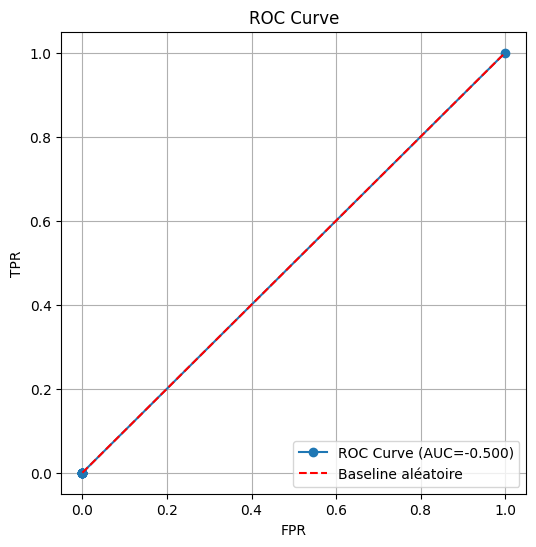

AUC : -0.500


In [54]:
# TODO: Implement and test cross-validation function on all classes.


features_setosa = iris_setosa.train.features
features_versi = iris_versicolor.train.features

labels_setosa = np.ones(len(features_setosa), dtype=int)
labels_versi = np.zeros(len(features_versi), dtype=int)

all_features = np.vstack([features_setosa, features_versi])
all_labels = np.concatenate([labels_setosa, labels_versi])

print("=== Cross-validation Setosa vs Versicolor ===")
cross_validation(all_features, all_labels, folds=10, threshold_stepsize=0.1)


=== Cross-validation Setosa vs Virginica ===


/var/folders/yx/0678sjj54074f8593p3dv0cc0000gn/T/ipykernel_32103/211272936.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score = np.trapz(TPR, x=FPR)


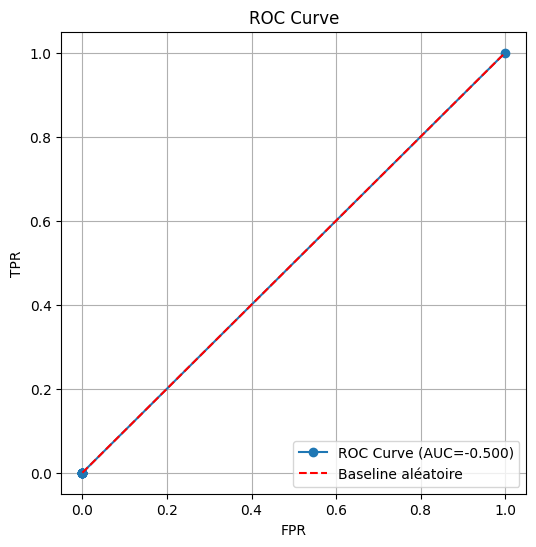

AUC : -0.500


In [55]:
# TODO: Implement and test cross-validation function on all classes.
features_setosa = iris_setosa.train.features
features_virgi = iris_virginica.train.features

labels_setosa = np.ones(len(features_setosa), dtype=int)   
labels_virgi = np.zeros(len(features_virgi), dtype=int)

all_features = np.vstack([features_setosa, features_virgi])
all_labels = np.concatenate([labels_setosa, labels_virgi])

print("=== Cross-validation Setosa vs Virginica ===")
cross_validation(all_features, all_labels, folds=10, threshold_stepsize=0.1)

=== Cross-validation Versicolor vs Virginica ===


/var/folders/yx/0678sjj54074f8593p3dv0cc0000gn/T/ipykernel_32103/211272936.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score = np.trapz(TPR, x=FPR)


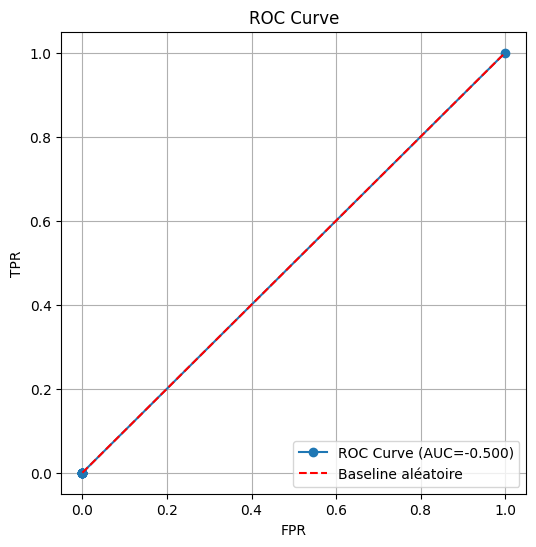

AUC : -0.500


In [56]:
# TODO: Implement and test cross-validation function on all classes.
features_versi = iris_versicolor.train.features
features_virgi = iris_virginica.train.features

labels_versi = np.ones(len(features_versi), dtype=int)
labels_virgi = np.zeros(len(features_virgi), dtype=int)

all_features = np.vstack([features_versi, features_virgi])
all_labels = np.concatenate([labels_versi, labels_virgi])

print("=== Cross-validation Versicolor vs Virginica ===")
cross_validation(all_features, all_labels, folds=10, threshold_stepsize=0.1)


# Questions for examination:

In addition to completing the assignment with all its tasks, you should also prepare to answer the following questions:

1) Why is it called "naive bayes"?

2) What are some downsides of the naive bayes learning algorithm?

3) When using ROC-curves, what is the theoretical best and worst result you can get?

4) When using ROC-curves, in this assignment for example, is a higher threshold-stepsize always better?  

5) When using cross-validation and ROC-curves, why is it important to take the correct mean values? What could go wrong?


# Finished!

Was part of the setup incorrect? Did you spot any inconsistencies in the assignment? Could something improve?

If so, please write them and send via email and send it to:

* marcus.gullstrand@ju.se

Thank you!